$$\Large \text{Image filtering} $$   


* Given a two-dimensional image, $I$, and a small matrix, $K$ of size $h×w$, (known as a convolution kernel), 
* $K$: a way of extracting an interesting image feature
* Compute the convolved image, $I∗K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of elementwise products between the image and the kernel:

$$ (I * K)_{xy} = \sum_{i=1}^h \sum_{j=1}^w {K_{ij} \cdot I_{x + i - 1, y + j - 1}} $$

In [1]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
import pylab
import time

def convolve2d(image, kernel):    
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output


# Origin Image

In [18]:
def show(img):
    plt.figure(figsize=(16,14))
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

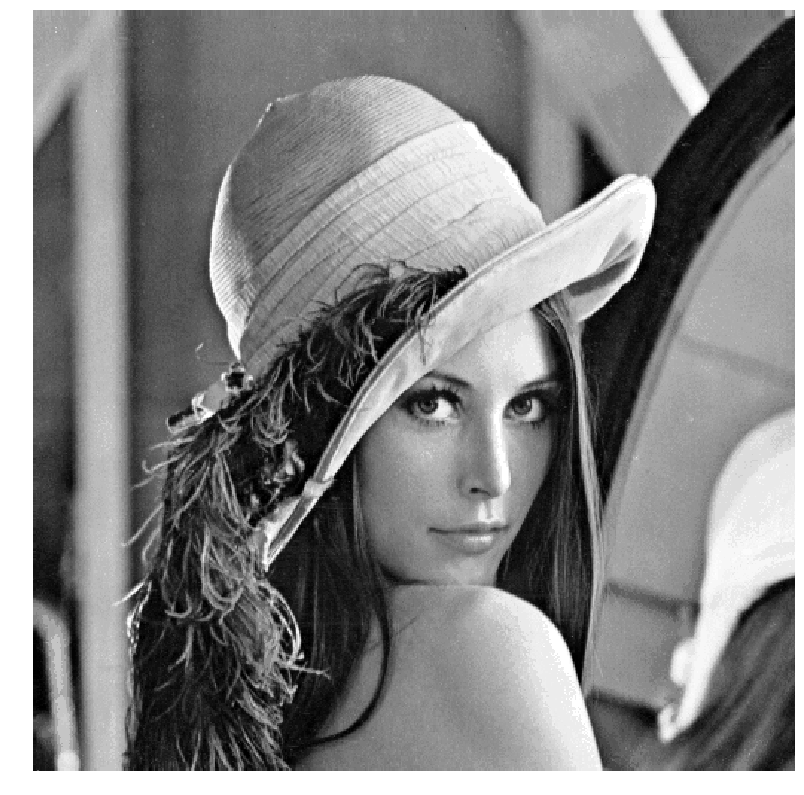

In [19]:
img = io.imread('lena_color.gif')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
show(img)

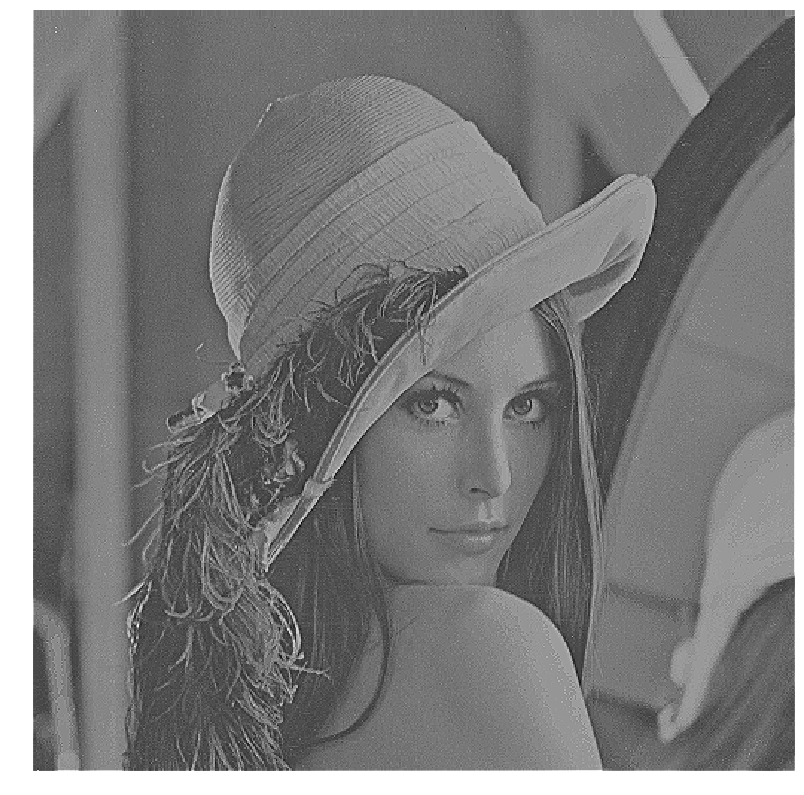

In [20]:
sharpened_img = convolve2d(img, np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]))
show(sharpened_img)

# Convolve an edge detection kernel with an image

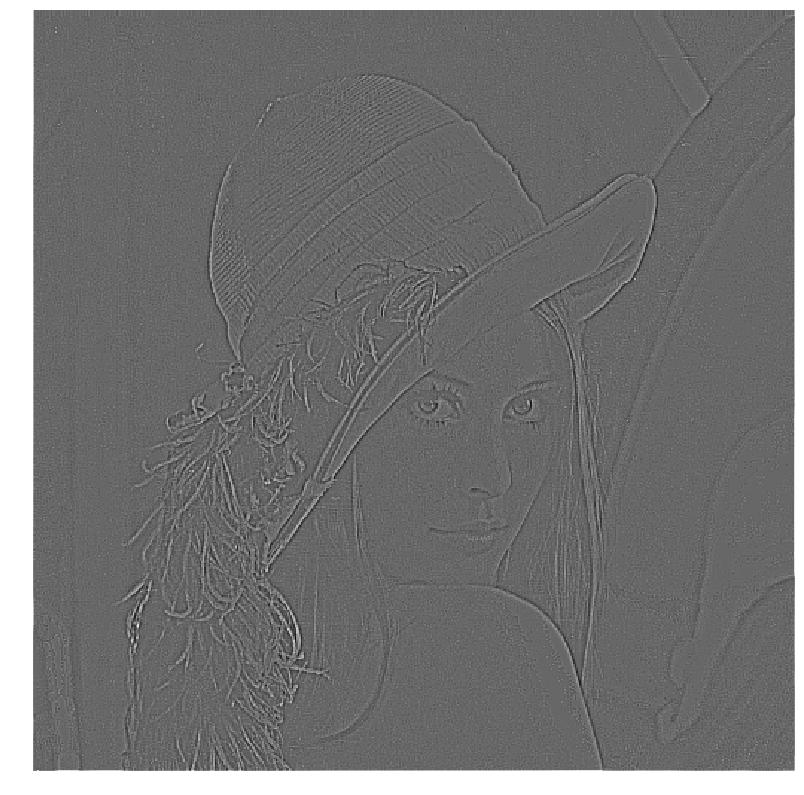

In [21]:
from skimage import exposure
edge_img = convolve2d(img,np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))
edges_equalized = exposure.equalize_adapthist(edge_img/np.max(np.abs(edge_img)), clip_limit=0.008)
show(edge_img)

# Apply sharpen and edge detection filters back to back

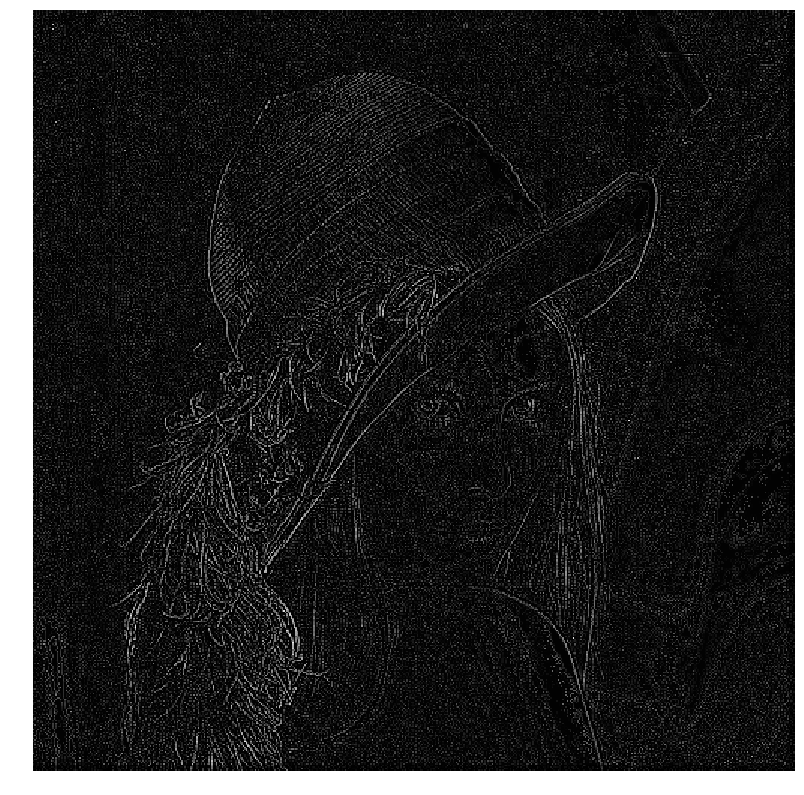

Time execute: 0.5140008926391602s


In [23]:
import scipy.signal
s = time.time()
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.008)
show(edges_equalized)
print(f'Time execute: {time.time()-s}s')

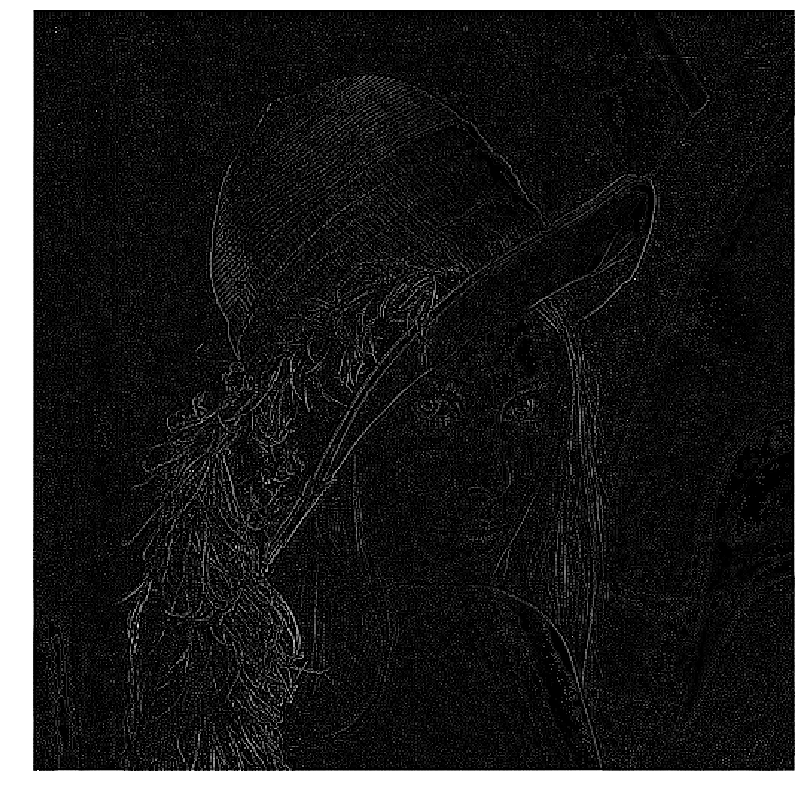

Time execute: 4.153939485549927s


In [24]:
s = time.time()
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = convolve2d(img, sharpen_kernel)
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = convolve2d(image_sharpen, edge_kernel)
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.008)
show(edges_equalized)
print(f'Time execute: {time.time()-s}s')

# Apply blur filter to denoise an image

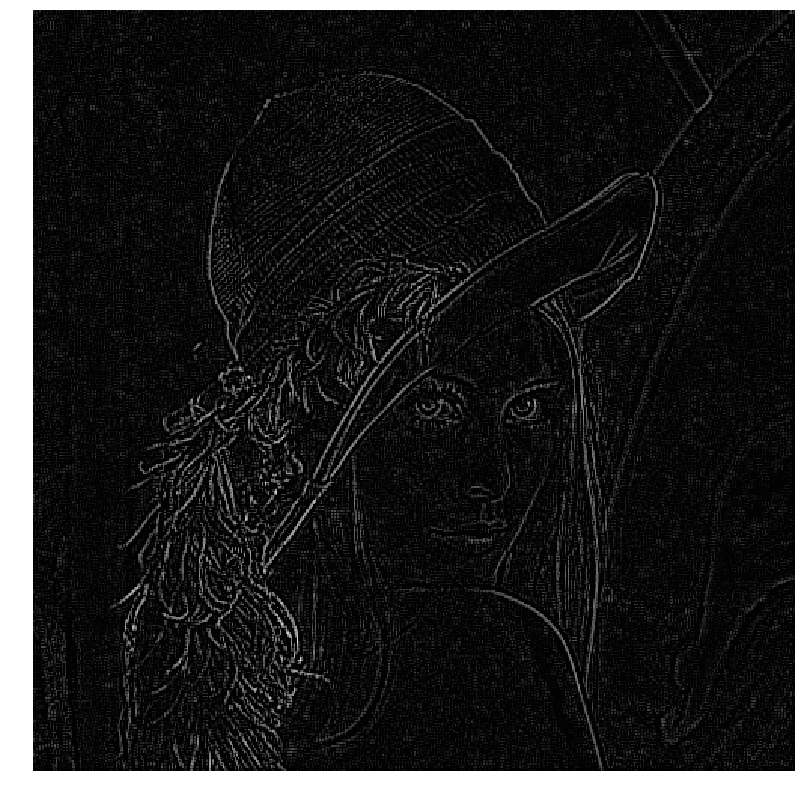

In [14]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
# apply edge detection filter to the sharpen image
edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.008)
show(denoised_equalized)